# Adenovirus Disease Prediction for Child Healthcare Using Machine Learning

The proposed work aims to develop a machine learning model for early detection of Adenovirus disease using individual bodily parameters. This user-friendly tool could reduce reliance on physical examinations, particularly beneficial in rural areas with limited healthcare access. The model targets preventive health awareness, especially in children, to mitigate the impact of Adenovirus outbreaks, emphasizing the potential to curb widespread infections and improve resource allocation.

Adenovirus Disease
Adenovirus disease refers to a range of infections produced by adenoviruses, a virus family that can infect humans. Adenoviruses are classified into approximately 50 different kinds, each of which can induce a unique set of symptoms. Adenovirus infections are most common in children, but they can occur in people of all ages. The most common symptoms of adenovirus infection include:

Breathing Problem
Pink Eye
Pneumonia
Fever
Acute Gastroenteritis (inflammation of the stomach and intestines)
Dry cough
Sore throat
Bladder infection

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree 
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm 


adenoviruses = pd.read_csv('Adenoviruses_Dataset.csv') 

pd.set_option('display.max_columns', None) 

print(adenoviruses.head())

  Breathing Problem Pink Eye Pneumonia  Fever Acute Gastroenteritis   \
0               Yes      Yes        Yes   Yes                    Yes   
1               Yes      Yes        Yes   Yes                    Yes   
2               Yes      Yes        Yes   Yes                     No   
3               Yes      Yes        Yes   Yes                    Yes   
4               Yes      Yes        Yes   Yes                    Yes   

  Dry Cough Sore throat Bladder Infection Adenoviruses  
0       Yes         Yes                No          Yes  
1       Yes         Yes               Yes          Yes  
2       Yes         Yes               Yes          Yes  
3       Yes          No               Yes          Yes  
4       Yes         Yes                No          Yes  


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
adenoviruses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Breathing Problem       5434 non-null   object
 1   Pink Eye                5434 non-null   object
 2   Pneumonia               5434 non-null   object
 3   Fever                   5434 non-null   object
 4   Acute Gastroenteritis   5434 non-null   object
 5   Dry Cough               5434 non-null   object
 6   Sore throat             5434 non-null   object
 7   Bladder Infection       5434 non-null   object
 8   Adenoviruses            5434 non-null   object
dtypes: object(9)
memory usage: 382.2+ KB


In [4]:
print(adenoviruses.describe(include='all'))

       Breathing Problem Pink Eye Pneumonia  Fever Acute Gastroenteritis   \
count               5434     5434       5434  5434                   5434   
unique                 2        2          2     2                      2   
top                  Yes      Yes        Yes   Yes                    Yes   
freq                3620     3620       3620  4273                   2820   

       Dry Cough Sore throat Bladder Infection Adenoviruses  
count       5434        5434              5434         5434  
unique         2           2                 2            2  
top          Yes         Yes                No          Yes  
freq        4307        3953              2920         4383  


In [5]:
from sklearn.preprocessing import LabelEncoder 
e=LabelEncoder() 

adenoviruses['Breathing Problem']=e.fit_transform(adenoviruses['Breathing Problem']) 
adenoviruses['Pink Eye']=e.fit_transform(adenoviruses['Pink Eye']) 
adenoviruses['Pneumonia ']=e.fit_transform(adenoviruses['Pneumonia ']) 
adenoviruses['Fever']=e.fit_transform(adenoviruses['Fever']) 
adenoviruses['Acute Gastroenteritis ']=e.fit_transform(adenoviruses['Acute Gastroenteritis ']) 
adenoviruses['Dry Cough']=e.fit_transform(adenoviruses['Dry Cough']) 
adenoviruses['Sore throat']=e.fit_transform(adenoviruses['Sore throat']) 
adenoviruses['Bladder Infection']=e.fit_transform(adenoviruses['Bladder Infection']) 
adenoviruses['Adenoviruses']=e.fit_transform(adenoviruses['Adenoviruses']) 

print(adenoviruses.head())

   Breathing Problem  Pink Eye  Pneumonia   Fever  Acute Gastroenteritis   \
0                  1         1           1      1                       1   
1                  1         1           1      1                       1   
2                  1         1           1      1                       0   
3                  1         1           1      1                       1   
4                  1         1           1      1                       1   

   Dry Cough  Sore throat  Bladder Infection  Adenoviruses  
0          1            1                  0             1  
1          1            1                  1             1  
2          1            1                  1             1  
3          1            0                  1             1  
4          1            1                  0             1  


In [6]:
corr=adenoviruses.corr() 
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Pink Eye,Pneumonia,Fever,Acute Gastroenteritis,Dry Cough,Sore throat,Bladder Infection,Adenoviruses
Breathing Problem,1.000000,1.000000,1.000000,0.089903,0.066688,0.159562,0.303768,0.075318,0.443764
Pink Eye,1.000000,1.000000,1.000000,0.089903,0.066688,0.159562,0.303768,0.075318,0.443764
Pneumonia,1.000000,1.000000,1.000000,0.089903,0.066688,0.159562,0.303768,0.075318,0.443764
Fever,0.089903,0.089903,0.089903,1.000000,0.002252,0.127580,0.322235,0.073953,0.352891
Acute Gastroenteritis,0.066688,0.066688,0.066688,0.002252,1.000000,0.086176,0.079055,0.020941,0.119755
Dry Cough,0.159562,0.159562,0.159562,0.127580,0.086176,1.000000,0.213907,0.086843,0.464292
Sore throat,0.303768,0.303768,0.303768,0.322235,0.079055,0.213907,1.000000,0.081377,0.502848
Bladder Infection,0.075318,0.075318,0.075318,0.073953,0.020941,0.086843,0.081377,1.000000,0.089930
Adenoviruses,0.443764,0.443764,0.443764,0.352891,0.119755,0.464292,0.502848,0.089930,1.000000


In [7]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score 

x=adenoviruses.drop('Adenoviruses',axis=1) 
y=adenoviruses['Adenoviruses'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# Logistic Regression

In [8]:
model = LogisticRegression() 
# Fit the model 
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) 
# Score/Accuracy 
acc_logreg = model.score(x_test, y_test)*100
print(acc_logreg)

91.81232750689972


# RandomForestRegressor

In [9]:
model = RandomForestRegressor(n_estimators=1000) 
#Fit 
model.fit(x_train, y_train) 
#Score/Accuracy 
acc_randomforest=model.score(x_test, y_test)*100
print(acc_randomforest)

71.43399717376052


# GradientBoostingRegressor

In [10]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4) 
#Fit 
GBR.fit(x_train, y_train) 
acc_gbk=GBR.score(x_test, y_test)*100
print(acc_gbk)

71.11841992671106


# KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test) 
#Score/Accuracy 
acc_knn=knn.score(x_test, y_test)*100
print(acc_knn)

93.83624655013799


# DecisionTreeClassifier

In [12]:
t = tree.DecisionTreeClassifier() 
t.fit(x_train,y_train) 
y_pred = t.predict(x_test) 
#Score/Accuracy 
acc_decisiontree=t.score(x_test, y_test)*100
print(acc_decisiontree)

94.11223551057958


# K-Nearest Neighbors(KNN)

In [13]:
model = GaussianNB() 
model.fit(x_train,y_train) 
#Score/Accuracy 
acc_gaussian= model.score(x_test, y_test)*100
print(acc_gaussian)



87.21251149954001


# Support Vector Machines(SVM)

In [14]:
#Create a svm Classifier 
clf = svm.SVC(kernel='linear') # Linear Kernel 
#Train the model using the training sets 
clf.fit(x_train, y_train) 
#Predict the response for test dataset 
y_pred = clf.predict(x_test) 
#Score/Accuracy 
acc_svc=clf.score(x_test, y_test)*100
print(acc_svc)

92.73229070837166


# Model Accuracy

In [15]:
models = pd.DataFrame({ 
	'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
			'Random Forest', 'Naive Bayes', 
			'Decision Tree', 'Gradient Boosting Classifier'], 
	'Score': [acc_svc, acc_knn, acc_logreg, 
			acc_randomforest, acc_gaussian, acc_decisiontree, acc_gbk]}) 
print(models.sort_values(by='Score', ascending=False))

                          Model      Score
5                 Decision Tree  94.112236
1                           KNN  93.836247
0       Support Vector Machines  92.732291
2           Logistic Regression  91.812328
4                   Naive Bayes  87.212511
3                 Random Forest  71.433997
6  Gradient Boosting Classifier  71.118420


# The two best models are Decision Tree and K-Nearest Neighbours

 # 1. K-Nearest Neighbours

In [16]:
from sklearn.naive_bayes import GaussianNB

# Assuming x_train, y_train, x_test, and y_test are your training and testing data
model = GaussianNB() 
model.fit(x_train, y_train)  # Fit the model with training data

# Score/Accuracy on the test set
acc_gaussian = model.score(x_test, y_test) * 100
print(f"Accuracy: {acc_gaussian:.2f}%")

# Real Sample Input for Prediction
new_sample = [[1, 1, 1, 1, 1, 1, 1, 0]]
result = model.predict(new_sample)

# Final Prediction
if result == 1:
    print("The Patient is Adenovirus Positive(+ve)")
else:
    print("The Patient is Adenovirus Negative(-ve)")


Accuracy: 87.21%
The Patient is Adenovirus Positive(+ve)


In [17]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test and y_pred are your true and predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.94
Recall: 0.98


True Positives (TP): 863
True Negatives (TN): 145
False Positives (FP): 59
False Negatives (FN): 20


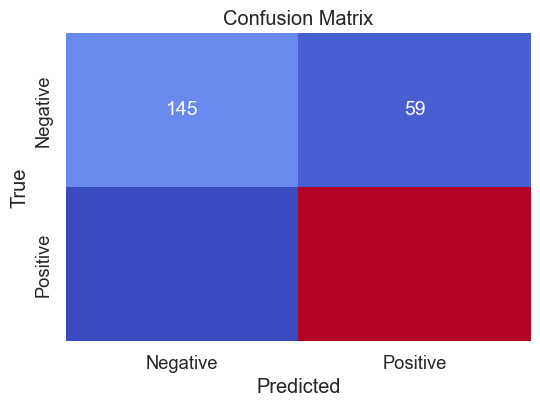

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Create a heatmap for the confusion matrix with a different color map
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            annot_kws={"size": 14},
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Show the plot
plt.show()

# 2. DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Assuming x_train, y_train, x_test, and y_test are your training and testing data
t = DecisionTreeClassifier() 
t.fit(x_train, y_train)  # Fit the model with training data

# Predictions on the test set
y_pred = t.predict(x_test) 

# Score/Accuracy on the test set
acc_decisiontree = t.score(x_test, y_test) * 100
print(f"Accuracy: {acc_decisiontree:.2f}%")

# Creating a new model for prediction
model = t  

# Real Sample Input for Prediction
new_sample = [[1, 1, 1, 1, 1, 1, 1, 0]]
result = model.predict(new_sample)

# Final Prediction
if result == 1:
    print("The Patient is Adenovirus Positive(+ve)")
else:
    print("The Patient is Adenovirus Negative(-ve)")

Accuracy: 94.11%
The Patient is Adenovirus Positive(+ve)


In [20]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test and y_pred are your true and predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.94
Recall: 0.99


True Positives (TP): 874
True Negatives (TN): 149
False Positives (FP): 55
False Negatives (FN): 9


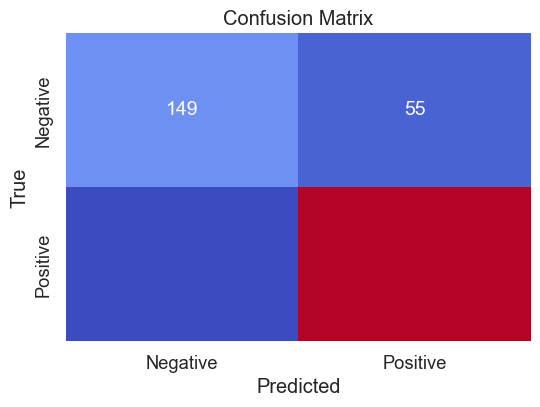

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Create a heatmap for the confusion matrix with a different color map
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            annot_kws={"size": 14},
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Display TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Show the plot
plt.show()

# Both Recall & Precision are higher for DecisionTreeClassifier hence it is the best model to predict presence of Adenovirus.